In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


from helpers import *
from gaussfit import *
from fit_double_exp import fitDualExp, dualexpo


# Define source parameters 
sdir   = "../calibrationdb/"
vfile  = "../../gain/hvdb/Sy4527channels_15112021_nominal.sub"
trange = (1610067905, 1637788392)
adders = 0.1

# Import data
data   = dataLoader( sdir, vfile, trange, adders )

# Further data preparation: swap PMTs 
data.loc[1619133315:1637788392, 'pmt']=data.loc[1619133315:1637788392, 'pmt'].replace([47, 58], [58,47])
data.loc[1619133315:1637788392, 'pmt']=data.loc[1619133315:1637788392, 'pmt'].replace([85, 88], [88,85])
data.loc[1619133315:1637788392, 'pmt']=data.loc[1619133315:1637788392, 'pmt'].replace([45, 50], [50,45])

Import data in folder../calibrationdb/ for interval (1610067905:1637788392)
Import voltage info from ../../gain/hvdb/Sy4527channels_15112021_nominal.sub
Adder corrections are activated with value 0.1


In [10]:
# Here we do the fit on all the pmts

basefilename="gain_fit_sum_exp"


import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages( basefilename+".pdf" )

pf = open( basefilename+".csv", 'w' )
pf.write( "pmt,amax,taumax,amin,taumin,eamax,etaumax,eamin,etaumin,npoints,nfitpoints,chi2,ndof,voltage\n" )

for PMT in range(360) :    
      
        if PMT in [ 79, 106, 212 ]:
            print( "Skipping not-working PMT {}".format(PMT) )
            continue
        
        fig, ax = plt.subplots(1,1, figsize=(10, 5.6))
        
        sel_data = data[data.pmt==PMT]
        
        p0=[ 0.2, 10, 0.2, 10 ]
        
        bounds=[0.0, [1.0, np.inf, 1.0, np.inf]]
        if PMT==307: 
            bounds=[[0.0, 10, 0.0, 10], [1.0, np.inf, 1.0, np.inf]]
        
        params_array, fig = fitDualExp(sel_data, dualexpo, p0, bounds, fig)
           
        ax.legend(fontsize=14)
        fig.tight_layout()
        
        pdf.savefig( fig )
        plt.close(fig)
        
        if len(params_array)  > 0:
            line=','.join([ str(v) for v in params_array ])
            pf.write(line+"\n")
        
pdf.close()
pf.close()

print("ALL DONE")

Skipping not-working PMT 79
Skipping not-working PMT 106
Skipping not-working PMT 212
PMT 275 has a failed fit
ALL DONE


PMT with tau min very small:  [2]
PMT with tau min very large:  [47]
PMT with tau min ~ tau max :  [ 47  51  99 117 153 241 247 255 263 269 286 293 300 352] 14


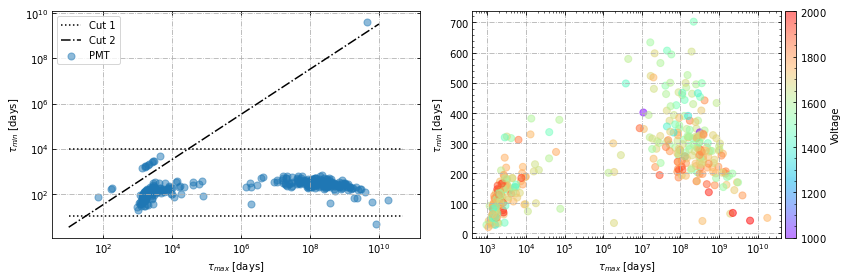

In [65]:
df = pd.read_csv("gain_fit_sum_exp.csv", sep=",")

# Here we define the selections to apply

# CUT 1 
_sel1= (df.taumin < 11) | (df.taumin > 1e4)

# CUT 2
def invline( t, x=[3e2, 3e3], y=[1e2, 1e3] ):
    
    b=(y[1]-y[0])/(x[1]-x[0])
    
    return b*(t-x[0]) + y[0]
xx = np.linspace(1e1, 1e10, 100)
yy = [ invline(y) for y in xx ]
_sel2 = df.taumin > invline( df.taumax)

print( "PMT with tau min very small: ", df[(df.taumin < 11)].pmt.values )
print( "PMT with tau min very large: ", df[(df.taumin > 1e4)].pmt.values )
print( "PMT with tau min ~ tau max : ", df[_sel2].pmt.values, len(df[_sel2].pmt.values) )

fig, ax = plt.subplots( 1,2, figsize=(12, 4) )

out=ax[0].scatter( df.taumax, df.taumin, s=50, alpha=0.5, label="PMT" )
ax[0].plot( [1e1, 5e10], [ 11, 11 ], ':', color='black' ,label="Cut 1" )
ax[0].plot( [1e1, 5e10], [ 1e4, 1e4 ], ':', color='black' )
ax[0].plot( xx, yy, '-.', color='black', label="Cut 2" )
ax[0].set_xlabel("$\\tau_{max}$ [days]")
ax[0].set_ylabel("$\\tau_{min}$ [days]")
ax[0].set_yscale("Log")
ax[0].set_xscale("Log")
ax[0].legend()



# Now we make the plot after the selection
_sel = _sel1 | _sel2
out=ax[1].scatter( df[~_sel].taumax, df[~_sel].taumin, s=50, c=df[~_sel].voltage, vmin=1000, vmax=2000, alpha=0.5, cmap='rainbow' )

ax[1].set_xlabel("$\\tau_{max}$ [days]")
ax[1].set_ylabel("$\\tau_{min}$ [days]")
#ax[1].set_yscale("Log")
ax[1].set_xscale("Log")
fig.colorbar(out, ax=ax[1], pad=0.01, label="Voltage")


plt.tight_layout()
plt.show()


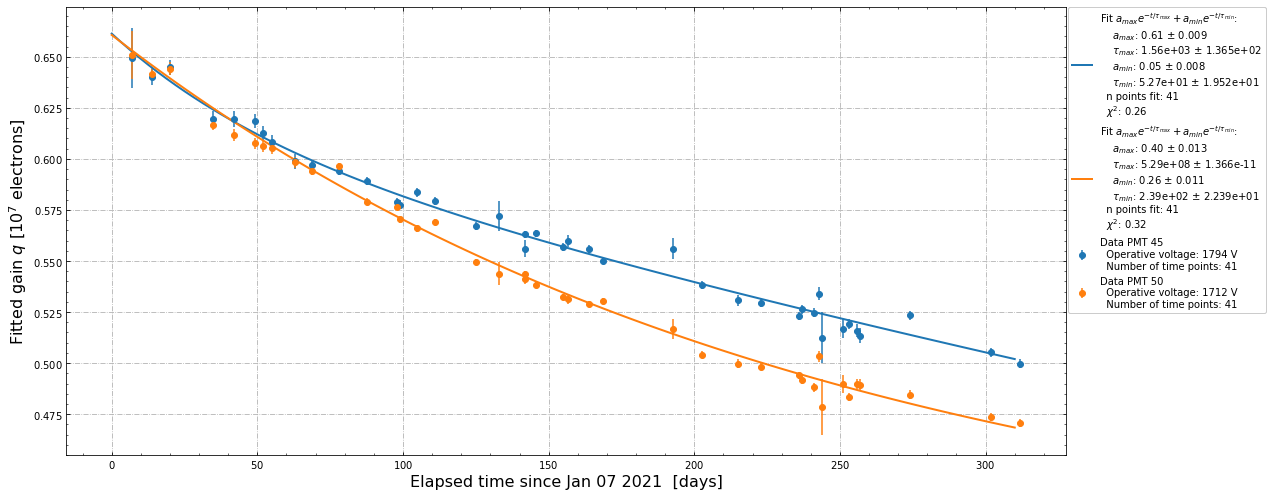

ALL DONE


In [10]:
# Here we plot just a handful of PMTs 

fig, ax = plt.subplots(1,1, figsize=(15, 7))

for PMT in [45, 50] :   
        sel_data = data[data.pmt==PMT]
        p0=[ 0.2, 10, 0.2, 10 ]
        bounds=[0, [1.0, np.inf, 1.0, np.inf]]
        params_array, fig = fitDualExp(sel_data, dualexpo, p0, bounds, fig)
        
        legend = fig.legend(fontsize=10, bbox_to_anchor=[1.18, 0.99])
        legend.get_frame().set_alpha(None)
        fig.tight_layout()
        
plt.show()
                
print("ALL DONE")